In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#data visualisation
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #bcz we hv many categorical variables to convert them into numeric
from imblearn.over_sampling import SMOTE#to handle class imbalance, here in ds many are yes
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle#save n use files later

In [ ]:
#2.data loading n understanding
#load csv data to a pandas df
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

tenure*monthly charges=total charges

In [ ]:
pd.set_option("display.max_columns",None)#this allows to not truncTate any columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


checking if there is no null
we need to change total charge into
float from object


In [ ]:
#dropping cust id as this is not required for modelling
df=df.drop(columns=["customerID"])

In [ ]:
df.head(2) #gives first 2 rows

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No  
1               No      Mailed check           56.95       1889.5    No

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(df["gender"].unique())

['Female' 'Male']


In [ ]:
print(df["SeniorCitizen"].unique())

[0 1]


In [ ]:
#printing unique values in all columns
numerical_features_list=["tenure","MonthlyCharges","TotalCharges"]
for col in df.columns:
 if col not in numerical_features_list:

  print(col,df[col].unique())
  print("."*50)

gender ['Female' 'Male']
..................................................
SeniorCitizen [0 1]
..................................................
Partner ['Yes' 'No']
..................................................
Dependents ['No' 'Yes']
..................................................
PhoneService ['No' 'Yes']
..................................................
MultipleLines ['No phone service' 'No' 'Yes']
..................................................
InternetService ['DSL' 'Fiber optic' 'No']
..................................................
OnlineSecurity ['No' 'Yes' 'No internet service']
..................................................
OnlineBackup ['Yes' 'No' 'No internet service']
..................................................
DeviceProtection ['No' 'Yes' 'No internet service']
..................................................
TechSupport ['No' 'Yes' 'No internet service']
..................................................
StreamingTV ['No' 'Yes' 'No internet 

In [ ]:
df.isnull().sum() #gives missing values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df["TotalCharges"] = df[TotalCharges].astype('float')

NameError: name 'TotalCharges' is not defined

In [ ]:
df[df["TotalCharges"]==" "]
#tenure is 0

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [ ]:
len(df[df["TotalCharges"]==" "])

11

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"}) #replace thta empty space as string with 0

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info() # totalcharges changed into float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#checking the distribution of target column
print(df["Churn"].value_counts())
#clear imbalance between the values of yes n no

Churn
No     5174
Yes    1869
Name: count, dtype: int64


insights
1.customer id removed as it is not required for modelling
2.no mising values in ds,were not considered under NaN etc
3.missing values in totalcharges columns were replaced with 0
4.class imbalnace identified in thw target

**3**.**EDA (Exploratory Data Analysis)**

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head(2)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No

In [ ]:
df.describe() #worjs only on numerical data not categorical

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

numerical features-analysis

understanding the distribution of numerical features

In [ ]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")

  #calculaye mean and median values for columns
  col_mean= df[column_name].mean()
  col_median=df[column_name].median()

  #add vertical lines for mean and median
  plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
  plt.axvline(col_median,color="green",linestyle="--",label="Median")

  plt.legend()

  plt.show()

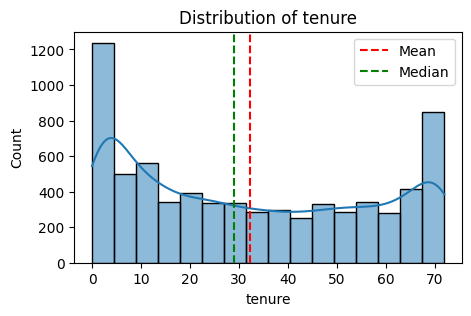

In [ ]:
plot_histogram(df,"tenure")

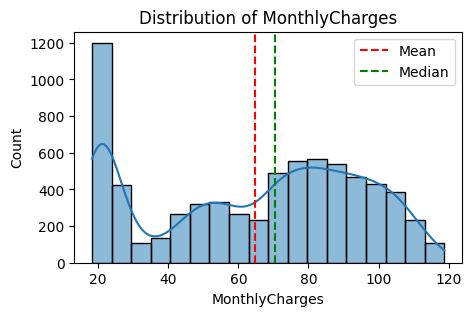

In [ ]:
plot_histogram(df,"MonthlyCharges")

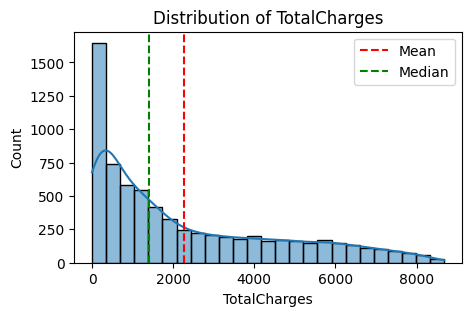

In [ ]:
plot_histogram(df,"TotalCharges")

box plot for numerical features


In [ ]:
def plot_boxplot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"boxplot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

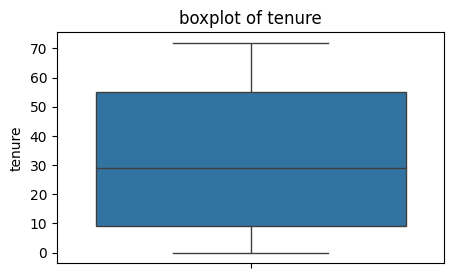

In [ ]:
plot_boxplot(df,"tenure")

we dont hv any outliers in tenure boxplot, so we dont hv to deal with it

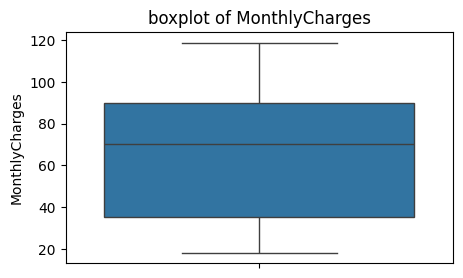

In [ ]:
plot_boxplot(df,"MonthlyCharges")

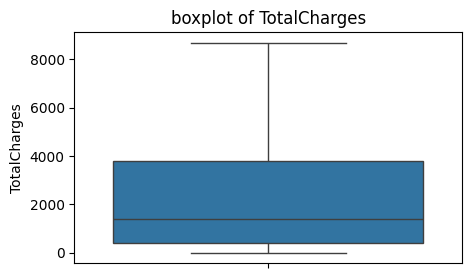

In [ ]:
plot_boxplot(df,"TotalCharges")

correlation heatmap for numerical columns

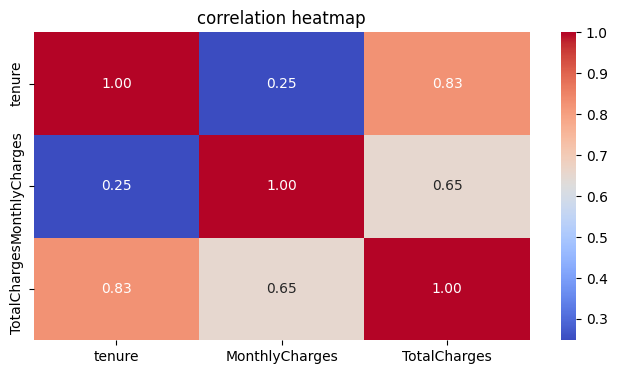

In [ ]:
#correlation matrix-heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()

categorical featires-analysis

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


countplot for categorical columns

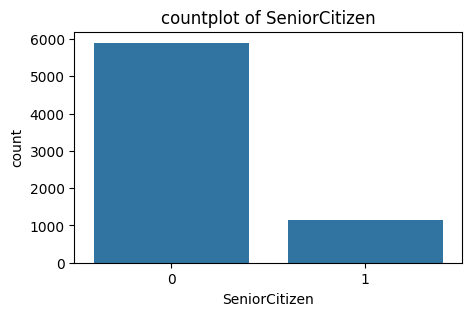

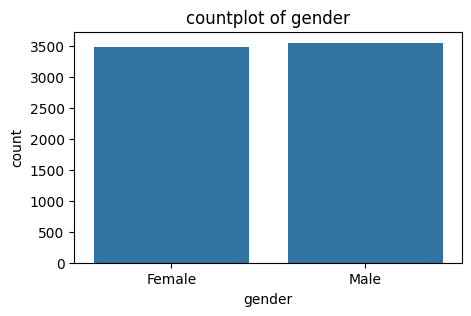

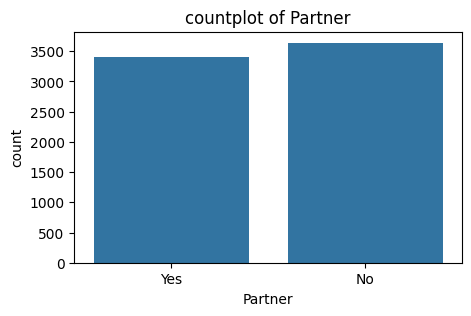

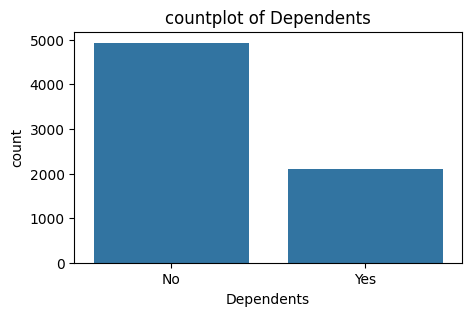

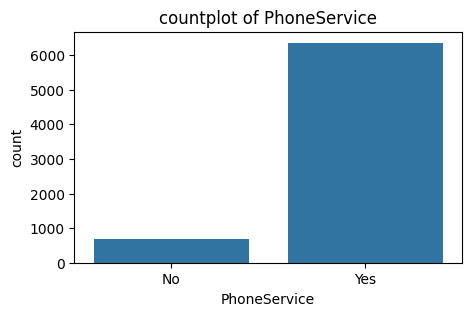

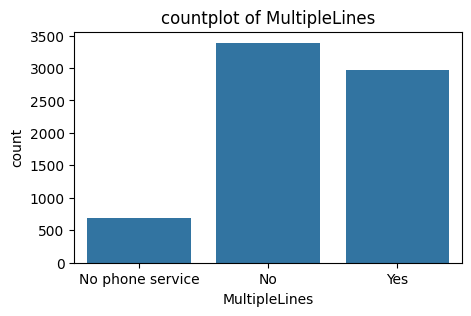

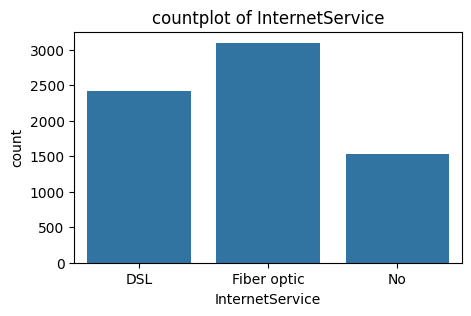

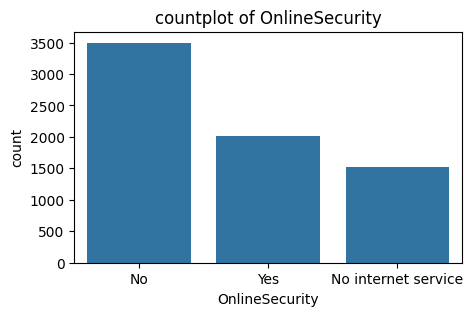

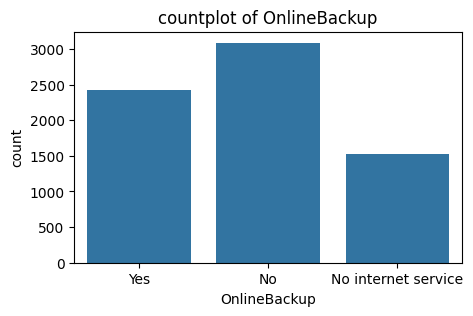

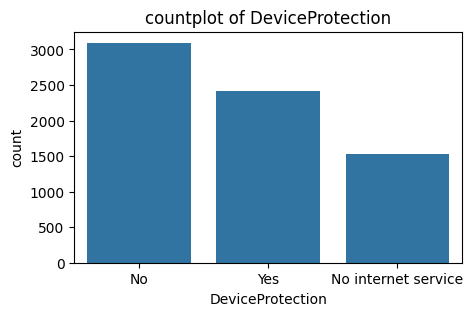

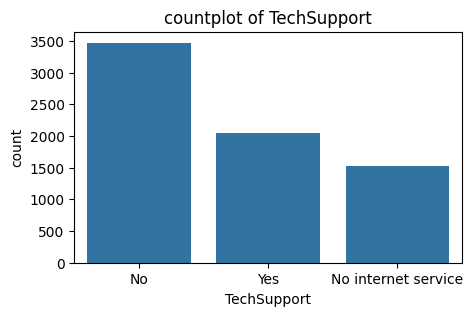

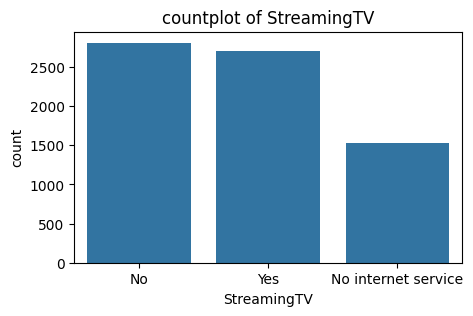

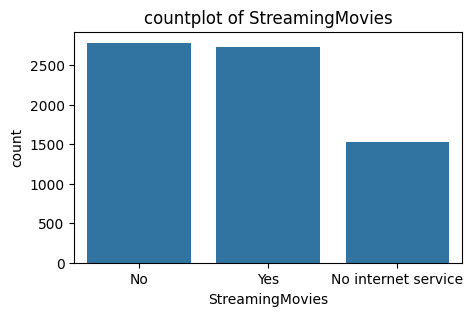

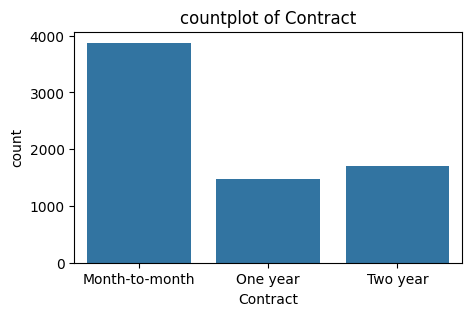

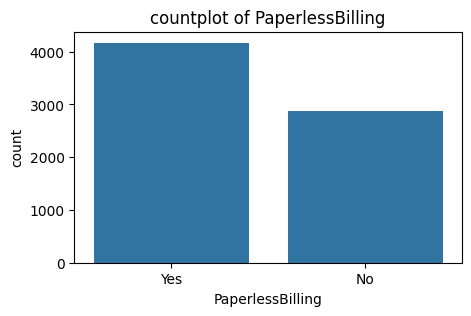

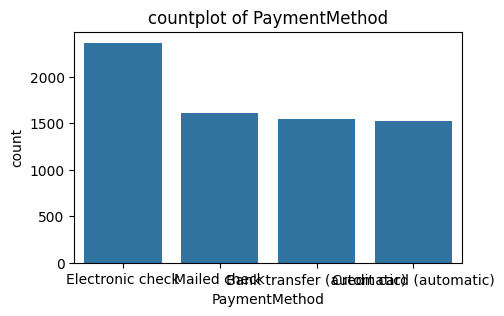

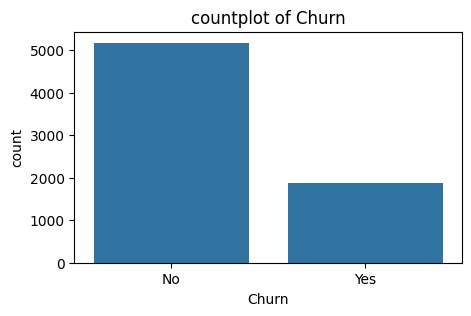

In [ ]:
object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols=["SeniorCitizen"]+object_cols
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"countplot of {col}")
  plt.show()

4.Data preprocessing

In [ ]:
df.head(3)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No  
2              Yes      Mailed check           53.85        108.15   Yes

label encoding of target column

In [ ]:
df["Churn"]= df["Churn"].replace({"Yes":1,"No":0})

/tmp/ipython-input-1733548797.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]= df["Churn"].replace({"Yes":1,"No":0})


In [ ]:
df.head(3)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0              Yes  Electronic check           29.85         29.85      0  
1               No      Mailed check           56.95       1889.50      0  
2              Yes      Mailed check           53.85        108.15      1

In [ ]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


label encoding of categorical features

In [ ]:
#identify columns with object datatype
object_columns = df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
#initialize a dictionary to save encoders
encoders={}

#apply label encoding
for col in object_columns:
  label_encoder=LabelEncoder()
  df[col]=label_encoder.fit_transform(df[col])
  encoders[col]=label_encoder

#save the encoders to a pickle file
with open("encoders.pkl","wb")as f:
  pickle.dump(encoders,f)



In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

training and test data split

In [ ]:
#splitting the features and target
X=df.drop(columns=["Churn"])
y=df["Churn"]

In [ ]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [ ]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [ ]:
#split training n test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(y_train.shape)

(5634,)


In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


SMOTE( synthetic minority oversampling tevhnique)

In [ ]:
smote=SMOTE(random_state=42)


In [ ]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
print(y_train_smote.shape)

(8276,)


In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


5.Model training

training with default hyperparameters

In [ ]:
#dictionary of models
models={
    "DecisionTree":DecisionTreeClassifier(random_state=42),
    "RandomForest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [ ]:
#dict to store cross validation results
cv_scores={}

#perfoorm s-fold cross validation for each model
for model_name,model in models.items():
  print(f"Training{model_name} with default parameters")
  scores=cross_val_score(model,X_train_smote,y_train_smote ,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*50)

TrainingDecisionTree with default parameters
DecisionTree cross-validation accuracy: 0.78
--------------------------------------------------
TrainingRandomForest with default parameters
RandomForest cross-validation accuracy: 0.84
--------------------------------------------------
TrainingXGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
--------------------------------------------------


In [ ]:
cv_scores

{'DecisionTree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'RandomForest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

random forest gives the highest accuracy compared to other models with default parameters

In [ ]:
rfc= RandomForestClassifier(random_state=42)

In [ ]:
model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


6.Model ervaluation

In [ ]:
#evaluate on test data
y_test_pred = model.predict(X_test)

print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("-"*50)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("-"*50)
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.7806955287437899
--------------------------------------------------
Confusion Matrix:
 [[885 151]
 [158 215]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
#save the trained model as pickle file'
model_data={"model":rfc,"features_names":X.columns.tolist()}


with open("customer_churn_model.pkl","wb")as f:
  pickle.dump(model_data,f)

7.load the saved model and build a predictive system

In [ ]:
#load the saved model and encoders

with open("customer_churn_model.pkl","rb")as f:
  model_data=pickle.load(f)

loaded_model=model_data["model"]
feature_names=model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(feature_names)


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


changes

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Train your model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save it
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


In [ ]:
input_data={'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 1, 'PhoneService': 'No', 'MultipleLines': 'No phone service', 'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No', 'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'MonthlyCharges': 29.85, 'TotalCharges': 29.85}

input_data_df=pd.DataFrame([input_data])


with open("encoders.pkl","rb")as f:
  encoders=pickle.load(f)

print(input_data_df.head())

#encode categorical featuires using the saved   encoders
for column,encoder in encoders.items():
  input_data_df[column]= encoder.transform(input_data_df[column])

#make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob=loaded_model.predict_proba(input_data_df)

print(prediction)

#results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"prediction probability:{pred_prob}")


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  
[0]
Prediction: No Churn
prediction probability:[[0.68 0.32]]


In [ ]:
import pandas as pd
import pickle

# Step 1: Input data as a dictionary
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# Step 2: Convert to DataFrame
input_data_df = pd.DataFrame([input_data])

# Step 3: Load encoders from pickle file
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Step 4: Load the trained model from pickle file
"""with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)"""

# Step 5: Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = encoder.transform(input_data_df[column])

# Step 6: Make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# Step 7: Output the results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob[0]}")


Prediction: No Churn
Prediction Probability: [0.68 0.32]


In [ ]:
import pandas as pd
import pickle

# Step 1: Input data as a dictionary
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# Step 2: Convert to DataFrame
input_data_df = pd.DataFrame([input_data])

# Step 3: Load encoders from pickle file
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Step 4: Load the trained model from pickle file
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Step 5: Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = encoder.transform(input_data_df[column])

# Step 6: Make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# Step 7: Output the results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob[0]}")

# Step 8: Create a new DataFrame with input data and prediction results
output_data = input_data_df.copy()
output_data['Prediction'] = prediction[0]
output_data['PredictionProbability_NoChurn'] = pred_prob[0][0]
output_data['PredictionProbability_Churn'] = pred_prob[0][1]


# Step 9: Save the output DataFrame to a CSV file
output_data.to_csv("prediction_output.csv", index=False)
print("\nPrediction output saved to prediction_output.csv")

Prediction: No Churn
Prediction Probability: [0.68 0.32]

Prediction output saved to prediction_output.csv


In [ ]:
import pandas as pd
import pickle

# Step 1: Load the original dataset
df_original = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn-1 (1).csv')

# Step 2: Create a copy for processing and drop the original Churn column
df_processed = df_original.copy()
# Rename the original 'Churn' column to 'Actual_Churn' before dropping for clarity
df_processed = df_processed.rename(columns={'Churn': 'Actual_Churn'})
df_processed = df_processed.drop(columns=["Actual_Churn"])


# Step 3: Load encoders from pickle file
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Step 4: Load the trained model from pickle file
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Step 5: Encode categorical features using the saved encoders for the entire original dataframe
input_data_df = df_processed.copy()
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        # Handle potential unseen values in the original dataset during encoding by adding a fallback
        try:
            input_data_df[column] = encoder.transform(input_data_df[column])
        except ValueError as e:
            print(f"Warning: Could not transform column '{column}'. Encountered unseen values. Error: {e}")
            # Optionally, handle this by mapping unseen values to a default or NaN
            # For now, skipping this column or handling error as per requirement


# Step 6: Handle the "TotalCharges" column - replace spaces and convert to float
input_data_df["TotalCharges"] = input_data_df["TotalCharges"].replace({" ":"0.0"})
input_data_df["TotalCharges"] = input_data_df["TotalCharges"].astype(float)


# Step 7: Make predictions for all rows
predictions = loaded_model.predict(input_data_df.drop(columns=["customerID"])) # Drop customerID for prediction
pred_probs = loaded_model.predict_proba(input_data_df.drop(columns=["customerID"]))[:, 1] # Get probability of churn


# Step 8: Add prediction results to the original dataframe
df_original['Predicted_Churn'] = predictions
df_original['Churn_Probability'] = pred_probs


# Step 9: Rename the original Churn column to "Churn (actual)" and select specified columns
df_original = df_original.rename(columns={'Churn': 'Churn (actual)'})
output_columns = [
    'customerID',
    'gender',
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'Contract',
    'OnlineSecurity',
    'TechSupport',
    'PaymentMethod',
    'OnlineBackup',
    'Dependents',
    'InternetService',
    'Partner',
    'DeviceProtection',
    'Churn (actual)',
    'Predicted_Churn',
    'Churn_Probability'
]
output_df = df_original[output_columns]


# Step 10: Save the output DataFrame to a CSV file
output_df.to_csv("full_dataset_predictions.csv", index=False)
print("Predictions for the entire dataset with selected columns saved to full_dataset_predictions.csv")

Predictions for the entire dataset with selected columns saved to full_dataset_predictions.csv


In [ ]:
(input_data_df.head())


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85

# Task
Generate a CSV file containing all columns from the input CSV, along with 'Predicted_Churn' and 'Churn_Probability' columns, using the trained model to predict churn probability for each customer.

## Load the trained model

### Subtask:
Load the trained model from the pickle file.


**Reasoning**:
Load the trained model and feature names from the pickle file.



In [ ]:
with open("customer_churn_model.pkl","rb")as f:
  model_data=pickle.load(f)

loaded_model=model_data["model"]
feature_names=model_data["features_names"]

## Extract feature importances

### Subtask:
Get the feature importances from the trained model.


**Reasoning**:
Access the feature_importances_ attribute of the loaded_model and store it in a variable.



In [ ]:
feature_importances = loaded_model.feature_names

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names'

**Reasoning**:
The loaded model was not fitted. I need to fit the model before accessing the feature importances. I will fit the model using the training data.



In [ ]:
loaded_model.fit(X_train_smote, y_train_smote)
feature_importances = loaded_model.feature_importances_

## Create a dataframe for visualization

### Subtask:
Create a pandas DataFrame with feature names and their importance scores.


**Reasoning**:
Create a pandas DataFrame with feature names and their importance scores and sort it.



In [ ]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

Feature  Importance
18      TotalCharges    0.141563
17    MonthlyCharges    0.136518
14          Contract    0.126562
4             tenure    0.121823
8     OnlineSecurity    0.086714
11       TechSupport    0.073617
16     PaymentMethod    0.044333
9       OnlineBackup    0.038016
3         Dependents    0.030381
7    InternetService    0.030181
2            Partner    0.027718
10  DeviceProtection    0.025640
0             gender    0.023036
6      MultipleLines    0.019801
15  PaperlessBilling    0.018695
12       StreamingTV    0.017644
13   StreamingMovies    0.016723
1      SeniorCitizen    0.014337
5       PhoneService    0.006695

## Visualize feature importance

### Subtask:
Generate a bar plot to visualize the feature importances.


**Reasoning**:
Generate a bar plot to visualize the feature importances.



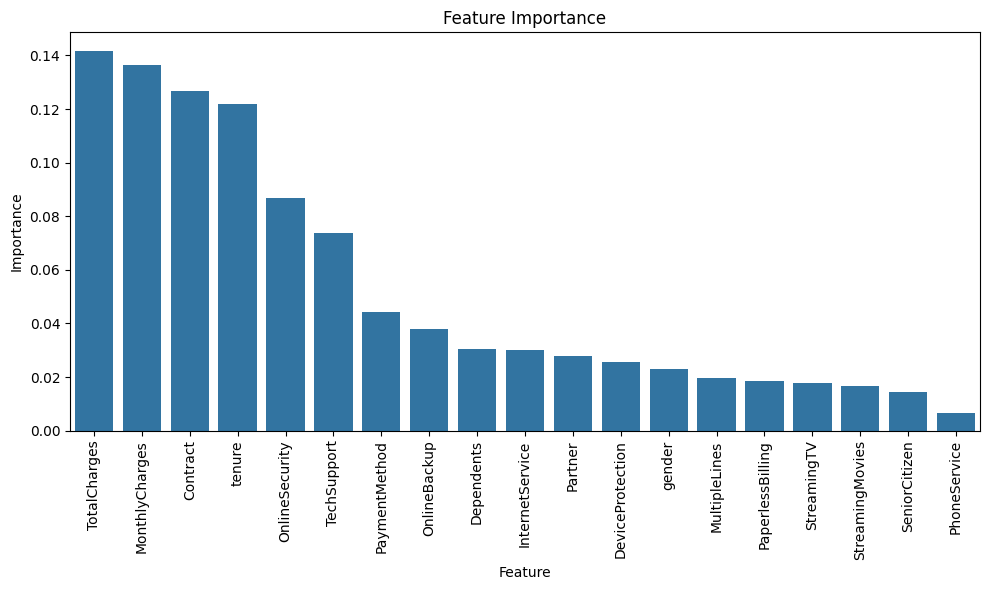

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The trained model was successfully loaded from the pickle file, including the model object and the list of feature names used during training.
*   Before extracting feature importances, the loaded model had to be fitted to the training data (`X_train_smote`, `y_train_smote`) as it was not already fitted upon loading.
*   A DataFrame was created showing the importance score for each feature, sorted in descending order of importance.
*   A bar plot was generated to visually represent the feature importances, highlighting which features were most influential in the churn prediction model.

### Insights or Next Steps

*   The feature importance visualization provides valuable insights into which customer characteristics or behaviors are most strongly associated with churn, which can inform targeted retention strategies.
*   The sorted feature importance list can be used to prioritize data collection efforts or feature engineering in future model iterations, focusing on the most impactful variables.
